In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

### Dataset Overview

#### Load the dataset House_Pricing.csv

In [2]:
data = pd.read_csv("House_Pricing.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


#### Display basic information about the dataset using .info() and .describe() to understand the features, data types, and any initial insights into missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.shape

(21613, 21)

In [7]:
data=data.iloc[:,2:]
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [8]:
data.shape

(21613, 19)

### Duplicate Removal

#### Rows: Check for duplicate rows in the dataset, if any, and remove them.

In [9]:
duplicated_rows = data.duplicated()
duplicated_rows.sum()

5

In [10]:
data.drop_duplicates(inplace=True)

#### Columns: Identify and drop duplicate columns, if any, based on their values.

In [11]:
duplicated_columns = data.T.duplicated()
duplicated_columns.sum()

0

### Handling Missing Values

#### Identify missing values in each column.

In [12]:
data.isnull().sum()

Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

#### Handle missing values:

#### For numerical columns, use imputation techniques like mean/median imputation.
#### For categorical columns, fill with mode.

In [13]:
num_cols = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [14]:
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [15]:
data.isnull().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

### Scaling Numerical Variables

#### Identify all numerical columns (excluding the target variable SalePrice).

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_cols = data.select_dtypes(include=['number']).columns.drop('Sale Price')

In [17]:
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [18]:
data[num_cols].describe()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,0.102149,0.264342,0.135088,0.008836,0.197658,0.735916,0.164291,0.060486,0.382610,0.041851,0.388586,0.650065,0.253413,0.273200,0.013921
std,0.028185,0.096268,0.069311,0.025093,0.215964,0.122827,0.090787,0.091828,0.255404,0.199264,0.270233,0.222899,0.116967,0.117952,0.031368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.218750,0.086038,0.002739,0.000000,0.666667,0.098684,0.000000,0.156522,0.000000,0.161616,0.506635,0.158638,0.187747,0.005111
50%,0.090909,0.281250,0.122264,0.004301,0.200000,0.666667,0.139254,0.000000,0.347826,0.000000,0.323232,0.668972,0.240033,0.247978,0.008005
75%,0.121212,0.312500,0.170566,0.006159,0.400000,0.777778,0.210526,0.116183,0.556522,0.000000,0.590909,0.839794,0.327243,0.337463,0.010835
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding Categorical Variables

#### Identify all categorical columns in the dataset.

In [19]:
cat_cols = data.select_dtypes(include=['object']).columns

#### Apply appropriate encoding techniques:
#### Use One-Hot Encoding for nominal categories.
#### Use Label Encoding for ordinal categories, if applicable.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

data.columns = data.columns.str.strip()

cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)


Categorical columns: Index(['Waterfront View', 'No of Times Visited', 'Condition of the House'], dtype='object')


In [21]:
ordinal_cols = ['Condition of the House', 'No of Times Visited']

le = LabelEncoder()
for col in ordinal_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

In [22]:
from sklearn.preprocessing import OneHotEncoder

nominal_cols = ['Waterfront View']

ohe = OneHotEncoder(drop='first')

encoded_nominal = ohe.fit_transform(data[nominal_cols])

encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=ohe.get_feature_names_out(nominal_cols))

data = data.drop(columns=nominal_cols).reset_index(drop=True)
data = pd.concat([data, encoded_nominal_df], axis=1)

### Outlier Removal

#### Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).

#### Remove outliers from these features if they are not representative of typical house prices.

In [23]:
import numpy as np
num_cols = data.select_dtypes(include=['number']).columns.drop('Sale Price')

In [24]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

data_cleaned = remove_outliers_iqr(data, num_cols)

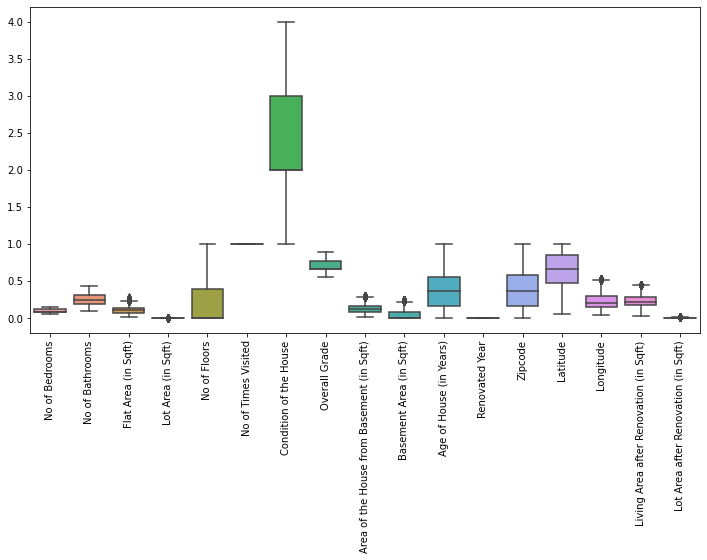

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[num_cols])
plt.xticks(rotation=90)
plt.show()

In [26]:
X = data.drop(columns=['Sale Price'])  # Features
y = data['Sale Price']  # Target variable

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (17286, 18) (17286,)
Testing set shape: (4322, 18) (4322,)
